In [19]:
import pandas as pd
import datetime
from sklearn import cluster


pd.set_option('display.max_column', None)

game_data = pd.read_csv('cleaned_game_data.csv', index_col = 0)

#Converting release_date to datetime
game_data['release_date'] = pd.to_datetime(game_data['release_date'])
game_data

,app_id,type,name,release_date,free_to_play,developer_1,developer_2,developer_3,publisher_1,publisher_2,publisher_3,genre_Action,genre_Adventure,genre_Animation & Modeling,genre_Audio Production,genre_Casual,genre_Design & Illustration,genre_Early Access,genre_Education,genre_Free to Play,genre_Gore,genre_Indie,genre_Massively Multiplayer,genre_Nudity,genre_Photo Editing,genre_RPG,genre_Racing,genre_Sexual Content,genre_Simulation,genre_Software Training,genre_Sports,genre_Strategy,genre_Utilities,genre_Video Production,genre_Violent,genre_Web Publishing,meanPlayers2017,meanPlayers2018,meanPlayers2019,meanPlayers2020,first_available_price,last_available_price,lowest_price,highest_price
0,578080,game,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21,0.0,PUBG Corporation,0,0,PUBG Corporation,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1443309,841204,366385,238828,29.99,29.99,14.99,29.99
1,570,game,Dota 2,2013-07-09,1.0,Valve,0,0,Valve,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,528727,450816,475222,442868,0.00,0.00,0.00,0.00
2,730,game,Counter-Strike: Global Offensive,2012-08-21,1.0,Valve,Hidden Path Entertainment,0,Valve,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,347535,317709,396300,660862,0.00,0.00,0.00,0.00
3,622590,NaN,PLAYERUNKNOWN'S BATTLEGROUNDS (Test Server),NaT,NaN,NaN,0,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2811,580,587,0.00,0.00,0.00,0.00
4,359550,game,Tom Clancy's Rainbow Six Siege,2015-12-01,0.0,Ubisoft Montreal,0,0,Ubisoft,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60281,67572,71262,90971,19.99,19.99,7.99,19.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,34000,advertising,Football Manager 2010,2009-10-29,1.0,Sports Interactive,0,0,SEGA,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102,88,70,89,0.00,0.00,0.00,0.00
1996,202480,NaN,Skyrim Creation Kit,NaT,NaN,NaN,0,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153,138,101,91,0.00,0.00,0.00,0.00
1997,429050,game,Feed and Grow: Fish,2016-01-08,0.0,Old B1ood,0,0,Greens s.r.o.,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,225,280,258,304,14.99,14.99,8.99,14.99
1998,209650,game,Call of Duty: Advanced Warfare,2014-11-03,0.0,Sledgehammer Games,Raven Software,0,Activision,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111,87,72,66,59.99,59.99,14.99,59.99


In [24]:
#Cleaning; Removing NAs
cleaned_data = game_data.dropna() #Remove NA rows
cleaned_data = cleaned_data.drop(['type','release_date','developer_1','developer_2','developer_3','publisher_1','publisher_2','publisher_3'], axis = 1)
cleaned_data

,app_id,name,free_to_play,genre_Action,genre_Adventure,genre_Animation & Modeling,genre_Audio Production,genre_Casual,genre_Design & Illustration,genre_Early Access,genre_Education,genre_Free to Play,genre_Gore,genre_Indie,genre_Massively Multiplayer,genre_Nudity,genre_Photo Editing,genre_RPG,genre_Racing,genre_Sexual Content,genre_Simulation,genre_Software Training,genre_Sports,genre_Strategy,genre_Utilities,genre_Video Production,genre_Violent,genre_Web Publishing,meanPlayers2017,meanPlayers2018,meanPlayers2019,meanPlayers2020,first_available_price,last_available_price,lowest_price,highest_price
0,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1443309,841204,366385,238828,29.99,29.99,14.99,29.99
1,570,Dota 2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,528727,450816,475222,442868,0.00,0.00,0.00,0.00
2,730,Counter-Strike: Global Offensive,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,347535,317709,396300,660862,0.00,0.00,0.00,0.00
4,359550,Tom Clancy's Rainbow Six Siege,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60281,67572,71262,90971,19.99,19.99,7.99,19.99
5,271590,Grand Theft Auto V,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96765,53811,68357,115017,29.99,14.99,14.99,29.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,64000,Men of War: Assault Squad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,120,100,78,76,9.99,1.99,0.99,9.99
1994,227860,Castle Story,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,250,80,70,84,24.99,24.99,7.49,24.99
1997,429050,Feed and Grow: Fish,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,225,280,258,304,14.99,14.99,8.99,14.99
1998,209650,Call of Duty: Advanced Warfare,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111,87,72,66,59.99,59.99,14.99,59.99


In [34]:
#Clustering
data = cleaned_data.drop(['app_id','name'],axis=1)
k_means = cluster.KMeans(n_clusters=3, max_iter=50, random_state=1)
k_means.fit(data) 
labels = k_means.labels_
pd.DataFrame(labels, index=cleaned_data.name, columns=['Cluster ID'])

,Cluster ID
name,
PLAYERUNKNOWN'S BATTLEGROUNDS,1
Dota 2,2
Counter-Strike: Global Offensive,2
Tom Clancy's Rainbow Six Siege,0
Grand Theft Auto V,0
...,...
Men of War: Assault Squad,0
Castle Story,0
Feed and Grow: Fish,0


In [32]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data.columns)

,free_to_play,genre_Action,genre_Adventure,genre_Animation & Modeling,genre_Audio Production,genre_Casual,genre_Design & Illustration,genre_Early Access,genre_Education,genre_Free to Play,genre_Gore,genre_Indie,genre_Massively Multiplayer,genre_Nudity,genre_Photo Editing,genre_RPG,genre_Racing,genre_Sexual Content,genre_Simulation,genre_Software Training,genre_Sports,genre_Strategy,genre_Utilities,genre_Video Production,genre_Violent,genre_Web Publishing,meanPlayers2017,meanPlayers2018,meanPlayers2019,meanPlayers2020,first_available_price,last_available_price,lowest_price,highest_price
0,0.191704,0.485987,0.304933,0.005045,0.001682,0.16648,0.006726,0.040919,0.001121,0.15583,0.003924,0.452915,0.103139,0.002803,0.001121,0.252242,0.034193,0.001682,0.243274,0.001121,0.047646,0.286996,0.008969,0.005045,0.007848,0.004484,9.852539e+02,805.036435,780.720291,1062.664238,15.657567,14.658335,5.068952,15.66208
1,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.443309e+06,841204.000000,366385.000000,238828.000000,29.990000,29.990000,14.990000,29.99000
2,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,4.381310e+05,384262.500000,435761.000000,551865.000000,0.000000,0.000000,0.000000,0.00000


Text(0, 0.5, 'SSE')

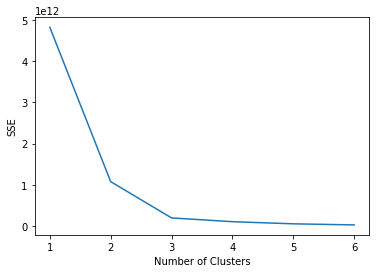

In [30]:
#SSE
import matplotlib.pyplot as plt
%matplotlib inline

numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')